In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

## 1、句子的长度

In [2]:
import gc

data_path = "../raw_data/train_set.csv"
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()[1:]

num_samples = len(lines)
print("The total number of samples is: %d" % len(lines))

char_samples = [line.split(',')[1] for line in lines]
char_sample_lengths = [len(char_sample.split()) for char_sample in char_samples]
print("The max length of sentence in training set is: %d" % max(char_sample_lengths))
print("The min length of sentence in training set is: %d" % min(char_sample_lengths))
print("The average length of sentence in training set is: %.1f" % (sum(char_sample_lengths) / float(num_samples)))

del lines
gc.collect()

The total number of samples is: 102277
The max length of sentence in training set is: 55804
The min length of sentence in training set is: 50
The average length of sentence in training set is: 1177.1


11

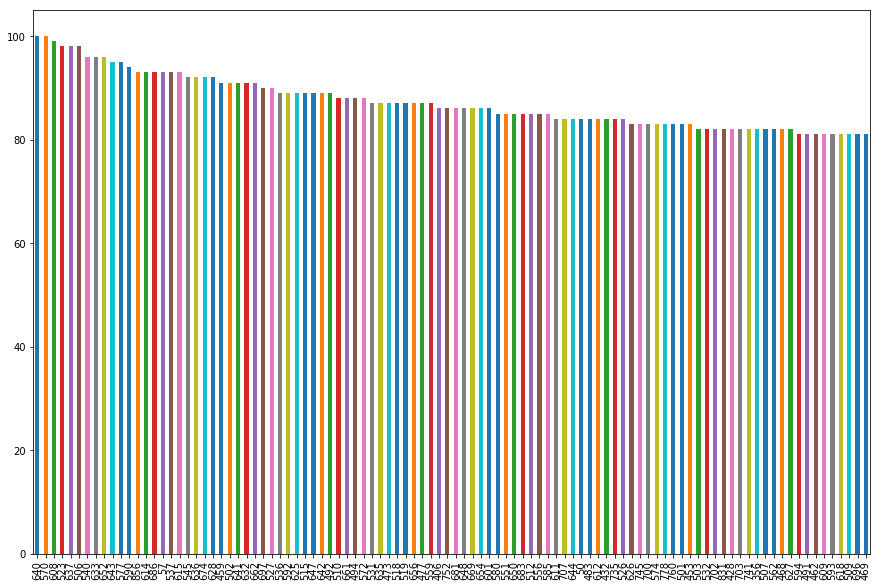

In [3]:
length_counts = pd.DataFrame(char_sample_lengths)[0].value_counts()
length_counts[:100].plot(kind='bar', figsize=(15, 10))

In [4]:
length_counts = length_counts.reset_index()
length_counts.rename(columns={'index': 'num_chars', 0: 'count'}, inplace=True)

# filter_cond = (length_counts['num_chars'] >= 500) & (length_counts['num_chars'] <= 3000)
filter_cond = length_counts['num_chars'] < 3072

percentage = np.sum(length_counts[filter_cond]['count']) / num_samples
print("The percentage of sentence length is less than 3072 is: %.4f%%" % (percentage * 100))

The percentage of sentence length is less than 3072 is: 94.4601%


**小结：**
1. 训练样本（句子）的数目是102277，其中，句子包含最多的字符数为55804、最少的字符数为50，即句子长度的跨度非常大；
2. 句子长度小于3072的样本数目占了94.5%左右，因此，我们将句子的长度设置为3072.